# Algorithmes de descente en optimisation différentiable sans contrainte

Mettez ci-dessous les imports classiques de librairie Python

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl

Dans ce TP, nous nous intéressons aux algorithmes pour la minimisation sans contrainte de fonctionnelles très générales: le problème s'écrit:

$$\min_{x\in\mathbb{R}^n} f(x).$$

Le but de cette séance est l'écriture d'un code de minimisation locale, et l'évaluation de ses performances sur les fonctions tests suivantes:

<li>$f_1(x,y) = 2(x+y-2)^2+(x-y)^2$.
<li>$f_2(x,y) = 100(y-x^2)^2 + (1-x)^2$ (fonction de Rosenbrock).

On appelle $\textit{oracle}$ une routine qui à un $x$ donné, renvoie la valeur $f(x)$ du critère, le gradient $\nabla f(x)$ (ou une approximation du gradient) s'il existe, et éventuellement la matrice Hessienne $H[f](x)$ (ou une approximation) si elle existe et si nécessaire:

$$[f(x),\nabla f(x),H[f](x)] = \textrm{oracle}(x)$$

> **A faire :** Calculer les gradients et les Hessiennes des deux fonctions proposées et implémenter les fonctions $\textrm{oracle}$ correspondantes.

>**Réponse :** *On trouve les gradients
$$\nabla f_1(x) = \begin{pmatrix}6x+2y-8\\6y+2x-8\end{pmatrix} \quad\mbox{ et }\quad \nabla f_2(x) = \begin{pmatrix}400(x^3-yx)+2(x-1)\\200(y-x^2)\end{pmatrix}.$$
Ainsi que les hessiennes
$$H[f_1](x) = \begin{pmatrix}6&2\\2&6\end{pmatrix} \quad\mbox{ et }\quad H[f_2](x) = \begin{pmatrix}1200x^2 - 400y + 2 & -400x\\-400x&200\end{pmatrix} .$$* 

In [61]:
def oracle1(x):
    f = 2*((x[0]+x[1]-2)**2)+(x[0]-x[1])**2
    df = []
    df.append(6*x[0]+2*x[1]-8)
    df.append(6*x[1]+2*x[0]-8)
    Hf = []
    Hf.append([])
    Hf[0].append(6)
    Hf[0].append(2)
    Hf.append([])
    Hf[1].append(2)
    Hf[1].append(6)
    
    return f,df,Hf

def oracle2(x):
    f = 100*((x[1]-x[0]**2)**2)+(1-x[0])**2
    df = []
    df.append(400*((x[0]**3)-x[1]*x[0])+2*(x[0]-1))
    df.append(200*(x[1]-x[0]**2))
    Hf = []
    Hf.append([])
    Hf[0].append(1200*(x[0]**2)-400*x[1]+2)
    Hf[0].append(-400*x[0])
    Hf.append([])
    Hf[1].append(-400*x[0])
    Hf[1].append(200)
    
    return f,df,Hf

On rappelle qu'un algorithme de descente appliqué à la minimisation de $f$ possède la forme suivante:

* **Données :** $x_0\in \mathbb{R}^n$ point initial arbitraire, un oracle.
* **Initialisation :** Numéro d'itération: $k=0$.
* **Tant que** le critère d'arrêt n'est pas satisfait, **faire**
  * Calcul de la direction de descente $d_k$.
  * Choix/Calcul du pas $s_k$.
  * Mise à jour: calcul du prochain itéré $x_{k+1}$.
  * $k = k + 1.$

> **A faire :** Résolution mathématique:

1. Donner les points critiques des fonctions proposées.
2. Les fonctions $f_i$ admettent-elles des extrema sur $\mathbb{R}^2$?

>**Réponse :** *Les points critiques $x^*_i\in\mathbb{R}^2$, $i\in\{1,2\},$ des fonctions $f_i$ vérifie
$$\nabla f_1(x^\star_1) = 0 \quad \Leftrightarrow \quad x^\star_1 = \begin{pmatrix} 1\\1 \end{pmatrix},$$
et
$$\nabla f_2(x^\star_2) = 0 \quad \Leftrightarrow \quad x^\star_2 = \begin{pmatrix} 1\\1 \end{pmatrix}.$$
On remarque que
$$\det(H[f_1](x^\star_1)) = \det\begin{pmatrix}6&2\\2&6\end{pmatrix}=32>0 \quad\mbox{ et }\quad \textrm{Tr}(H[f_1](x^\star_1)) = 12>0,$$
donc $x^\star_1$ est un minimum local de la fonction $f_1$.
De même, sachant que
$$\det(H[f_2](x^\star_2)) = \begin{pmatrix}802 & -400\\-400&200\end{pmatrix} = 400\quad\mbox{ et }\quad \textrm{Tr}(H[f_2](x^\star_2)) >0,$$
on déduit que $x^\star_2$ est un minimum local.
Les minimums sont même globaux car les fonctions $f_i$ sont $\ge 0$ et sont nulles en $x_i^\star$*

> **A faire :** Implémenter deux algorithmes de mimimisation, un par méthode de gradient à pas fixe et l'autre par une méthode de Newton locale. Les arguments d'entrée sont $\textrm{function}$ qui est l'oracle à minimiser, $\textrm{xini}$ qui est le point initial et $\textrm{h}$ qui est le pas de la méthode de gradient. Les arguments de sortie sont $\textrm{x}$ la valeur finale du point trouvée, $\textrm{xiter}$ qui est la valeur du point au cours des itérations et $\textrm{iter}$ le nombre d'itérations pour arriver à convergence.

In [180]:
def Gradient(function,h=1e-3,xini=np.array([0,0])):
    iter = 0
    itermax = 10000
    xiter = []
    xiter.append(xini)
    dk = function(xiter[0])[1]
    hdk = [i*(-h) for i in dk] # h*dk
    xiter.append(xiter[0] + hdk)
    eps = 1e-5
    
    while (npl.norm(function(xiter[iter])[1])>eps 
           and (npl.norm(xiter[iter+1]-xiter[iter])>eps*npl.norm(xiter[iter]) 
               or abs(function(xiter[iter+1])[0]-function(xiter[iter])[0])>eps*abs(function(xiter[iter])[0])) 
           and iter < itermax):
        dk = function(xiter[iter+1])[1]
        hdk = [i*(-h) for i in dk] # h*dk
        xiter.append(xiter[iter+1] + hdk)
        iter = iter + 1

    x = xiter[iter]
    return x,xiter,iter

x, xiter, iter = Gradient(oracle1)

print(x)
#print(xiter)
print(iter)

x, xiter, iter = Gradient(oracle2)

print(x)
#print(xiter)
print(iter)

[ 0.99999912  0.99999912]
1736
[ 0.99440095  0.98881076]
10000


In [185]:
def Newton(function,xini=[-100,100]):
    iter=0
    itermax = 10000
    xiter = []
    xiter.append(xini)
    eps = 1e-3
    f, df, Hf = function(xiter[0])
    
    while (npl.norm(df)>eps and iter < itermax):
        f, df, Hf = function(xiter[iter])
        Hinv = npl.inv(Hf)
        dk = np.dot(Hinv, df)
        #dk = npl.solve(Hf, df)
        xiter.append(xiter[iter] - dk)
        iter = iter + 1
    x = xiter[iter]
    
    return x,xiter,iter

x, xiter, iter = Newton(oracle1)

print(x)
#print(xiter)
print(iter)

x, xiter, iter = Newton(oracle2)

print(x)
#print(xiter)
print(iter)

[ 1.  1.]
2
[ 1.  1.]
4


> **A faire :** En utilisant le module $\textrm{matplotlib.pyplot}$, on veut représenter/dessiner la suite des itérés dans $\mathbb{R}^2$ avec la fonction $\textrm{scatter}$.On souhaite aussi représenter les fonctions $f_1$ et $f_2$ en utilisant la fonction $\textrm{contour}$ du module $\textrm{matplotlib.pyplot}$. On s'inspirera du code qui suit pour créer deux fonctions (une pour chaque oracle) $\textrm{affichage1(xiter)}$ et $\textrm{affichage2(xiter)}$ qui affiche représente les itérations.

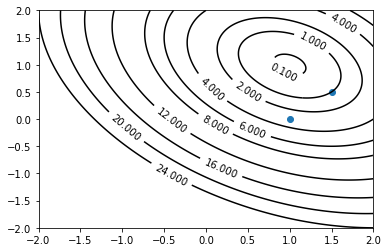

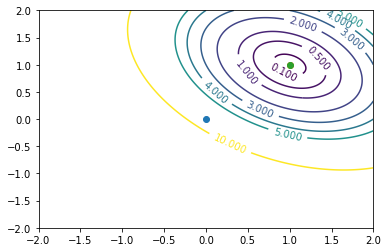

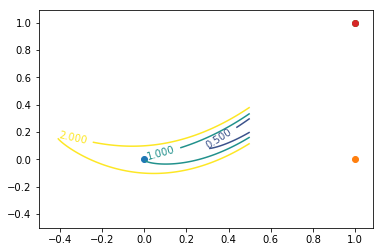

In [184]:
Nx = 1000
Ny = 1000
x = np.linspace(-2,2,Nx)
y = np.linspace(-2,2,Ny)
X, Y = np.meshgrid(x, y)
Z = 2*(X+Y-2)**2+(X-Y)**2
CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
plt.clabel(CS, inline=1, fontsize=10)
z = [[1,1.5],[0,0.5]]
plt.scatter(z[0],z[1],marker='o')
plt.show()

x1, xiter1, iter1 = Newton(oracle1)
def affichage1(xiter) :
    Nx = 1000
    Ny = 1000
    x = np.linspace(-2,2,Nx)
    y = np.linspace(-2,2,Ny)
    X, Y = np.meshgrid(x, y)
    for x in xiter:
        plt.scatter(x[0],x[1])
    CS=plt.contour(X,Y, oracle1([X,Y])[0], [0, 0.1, 0.5, 1, 2, 3, 4, 5, 10])
    plt.clabel(CS, inline=1, fontsize=10)
    
x2, xiter2, iter2 = Newton(oracle2)
def affichage2(xiter) :
    Nx = 1000
    Ny = 1000
    x = np.linspace(-0.5,0.5,Nx)
    y = np.linspace(-0.5,0.5,Ny)
    X, Y = np.meshgrid(x, y)
    for x in xiter:
        plt.scatter(x[0],x[1])
    CS = plt.contour(X,Y, oracle2([X,Y])[0], [0, 0.5, 1, 2])
    plt.clabel(CS, inline=1, fontsize=10)


affichage1(xiter1)
plt.show()
affichage2(xiter2)
plt.show()

Tester la méthode de Newton et la méthode de gradient pour différents points de départ et différents pas pour la fonction oracle1. Conclure